In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_dir="/content/drive/MyDrive/dataset_processing"
#test_dir = '/content/drive/MyDrive/valid'


In [ ]:
train_folders=os.listdir(train_dir)
print(train_folders)

# test_folders=os.listdir(test_dir)
# print(test_folders)

['negative', 'positive']


In [ ]:
import cv2

train_image_data=[]
train_labels=[]

# test_image_data=[]
# test_labels=[]

In [ ]:
label_dict={
    'negative':0,
    'positive':1
}

In [ ]:
from keras.preprocessing import image
count=0
try:

    for file in train_folders:
        try:

            path=os.path.join(train_dir,file)
            print(path)
            for im in os.listdir(path):
                try:

                    img=image.load_img(os.path.join(path,im),target_size=((64,64)))
                    img_array=image.img_to_array(img)
                    train_image_data.append(img_array)
                    train_labels.append(label_dict[file])
                    count=count+1
                except:
                    print("Error for processing one image")

            print(count)
        except:
            print("Error in folder")
except:
    print("Done processing")



/content/drive/MyDrive/dataset_processing/negative
2182
/content/drive/MyDrive/dataset_processing/positive
5133


In [ ]:
print(len(train_image_data),len(train_labels))

5133 5133


In [ ]:
# from keras.preprocessing import image
# count=0
# try:
#     for file in test_folders:
#         try:

#             path=os.path.join(test_dir,file)
#             print(path)
#             for im in os.listdir(path):
#                 try:

#                     img=image.load_img(os.path.join(path,im),target_size=((64,64)))
#                     img_array=image.img_to_array(img)
#                     test_image_data.append(img_array)
#                     test_labels.append(label_dict[file])
#                     count=count+1
#                 except:
#                     print("Error for processing one image")
#             print(count)
#         except:
#             print("Error in folder")
# except:
#     print("Done processing")



In [ ]:

# print(len(test_image_data),len(test_labels))

In [ ]:
combined = list(zip(train_image_data,train_labels))
train_image_data[:],train_labels[:]=zip(*combined)

# combined = list(zip(test_image_data,test_labels))
# test_image_data[:],test_labels[:]=zip(*combined)

In [ ]:
print(train_labels)
# print(test_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
x_train=np.array(train_image_data)
y_train=np.array(train_labels)

print(x_train.shape,y_train.shape)

# x_test=np.array(test_image_data)
# y_test=np.array(test_labels)

# print(x_test.shape,y_test.shape)

(5133, 64, 64, 3) (5133,)


In [ ]:
from tensorflow.python.keras.utils import np_utils

y_train=np_utils.to_categorical(y_train)
print(x_train.shape,y_train.shape)



# y_test=np_utils.to_categorical(y_test)
# print(x_test.shape,y_test.shape)

(5133, 64, 64, 3) (5133, 2)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
augment = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.01,
    height_shift_range=0.01,
    horizontal_flip=False,
    vertical_flip=False,
)
augment.fit(x_train)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.regularizers import *
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential



In [ ]:
model = ResNet50(weights='imagenet', include_top=False,input_shape=(64,64,3))

In [ ]:
 model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 70, 70, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 32, 32, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 32, 32, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
for num in range(len(model.layers)):
    print(num,model.layers[num])

0 <keras.src.engine.input_layer.InputLayer object at 0x7c4959bafbe0>
1 <keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7c490555b790>
2 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7c49055590c0>
3 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7c4905558c10>
4 <keras.src.layers.core.activation.Activation object at 0x7c490556e050>
5 <keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7c490556d030>
6 <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7c4925e87d60>
7 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7c49255aef50>
8 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7c4905b1bd60>
9 <keras.src.layers.core.activation.Activation object at 0x7c49055826b0>
10 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7c4905583700>
11 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7c49255a70d0>
12 <keras.src

In [ ]:
for layer in model.layers[:169]:
  layer.trainable=False
for i,layer in enumerate(model.layers):
  print(i,layer.name,layer.trainable)

0 input_2 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

In [ ]:
av1=Flatten()(model.output)
fc1=Dense(256,activation='relu',kernel_regularizer=l2(0.01),input_dim=256)(av1)
d1=Dropout(0.5)(fc1)
fc2=Dense(128,activation='relu',kernel_regularizer=l2(0.01),input_dim=128)(d1)
d2=Dropout(0.5)(fc2)
fc3=Dense(2,activation='sigmoid')(d2)

model_R=Model(model.input,fc3)
model_R.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 70, 70, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 32, 32, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 32, 32, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
model_R.compile(loss = 'categorical_crossentropy',
            optimizer = 'Adam',
            metrics = ['accuracy'])



In [ ]:
history = model_R.fit(x_train, y_train, validation_split=0.20, epochs=20, batch_size=32)

Epoch 1/20
129/129 [==============================] - 121s 890ms/step - loss: 4.5353 - accuracy: 0.5641 - val_loss: 2.6574 - val_accuracy: 0.1928
Epoch 2/20
129/129 [==============================] - 111s 863ms/step - loss: 1.9734 - accuracy: 0.6690 - val_loss: 1.7518 - val_accuracy: 0.4567
Epoch 3/20
129/129 [==============================] - 112s 868ms/step - loss: 1.3060 - accuracy: 0.7311 - val_loss: 1.2366 - val_accuracy: 0.5988
Epoch 4/20
129/129 [==============================] - 107s 830ms/step - loss: 0.9813 - accuracy: 0.7879 - val_loss: 1.1525 - val_accuracy: 0.5901
Epoch 5/20
129/129 [==============================] - 105s 810ms/step - loss: 0.7937 - accuracy: 0.8278 - val_loss: 0.8235 - val_accuracy: 0.7556
Epoch 6/20
129/129 [==============================] - 100s 779ms/step - loss: 0.6570 - accuracy: 0.8463 - val_loss: 1.0953 - val_accuracy: 0.5355
Epoch 7/20
129/129 [==============================] - 107s 834ms/step - loss: 0.5491 - accuracy: 0.8768 - val_loss: 0.8108 -

In [ ]:
# history = model_R.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32)

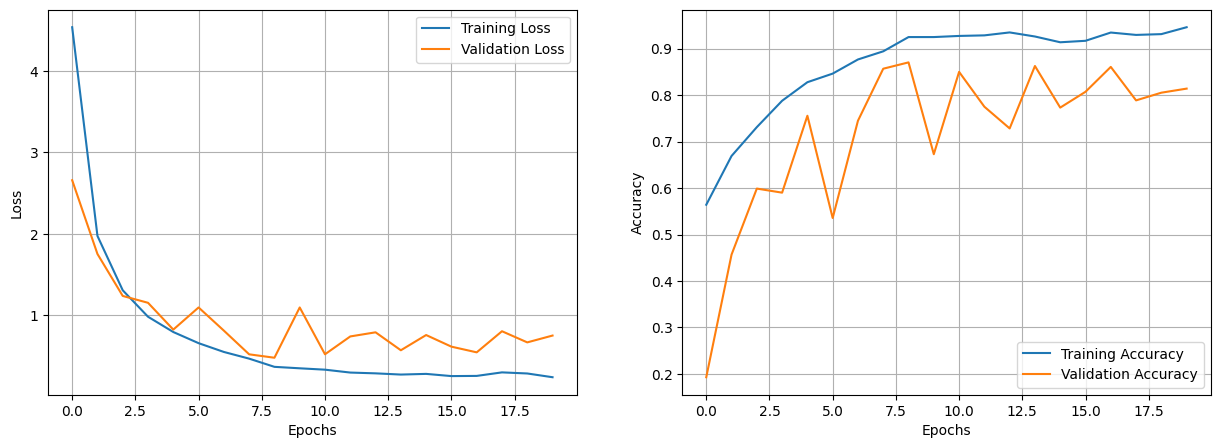

In [ ]:
plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.grid(True)
plt.legend()

In [ ]:
model_R.save('Parkinson_Detection_Resnet.keras')



# test_steps = test_generator.samples // BATCH_SIZE
# loss, accuracy = model.evaluate(test_generator, steps=test_steps)
# print(f'Test Loss: {loss:.4f}')
# print(f'Test Accuracy: {accuracy:.4f}')

In [ ]:
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model = load_model('Parkinson_Detection_Resnet.keras')

In [ ]:
test_images=r'/content/drive/MyDrive/Validation_Dataset'

test_image_data=[]
test_labels=[]

test_folders=os.listdir(test_images)
print(test_folders)

label_dict={
    'positive':1,
    'negative':0
}
count=0
from keras.preprocessing import image

for file in test_folders:
  path=os.path.join(test_images,file)
  for file1 in os.listdir(path):
    img=image.load_img(os.path.join(path,file1),target_size=((64,64)))
    img_array=image.img_to_array(img)
    test_image_data.append(img_array)
    test_labels.append(label_dict[file])
    count=count+1
  print(count)

combined = list(zip(test_image_data,test_labels))
test_image_data[:],test_labels[:]=zip(*combined)


print(test_labels)
x_test=np.array(test_image_data)
y_test=np.array(test_labels)




# hist=model.fit(x_train,y_train,
#                         shuffle=True,
#                         batch_size=32,
#                         epochs=1,
#                         validation_split=0.10)

['positive', 'negative']
715
1655
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
predictions = model.predict(x_test,batch_size=32)
predicted_labels = np.argmax(predictions, axis=1)

52/52 [==============================] - 26s 487ms/step


In [ ]:
accuracy = np.mean(predicted_labels == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 44.53%


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_labels,predicted_labels))
print(confusion_matrix(test_labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.51      0.42      0.46       940
           1       0.39      0.48      0.43       715

    accuracy                           0.45      1655
   macro avg       0.45      0.45      0.44      1655
weighted avg       0.46      0.45      0.45      1655

[[393 547]
 [371 344]]
